# Data-Driven Insights for Predicting Vaccine Uptake

NoteBook Structure

i) Business Understanding 

ii) Data Understanding

iii) Data Preparation & EDA 

iv) Modeling

v) Evaluation

vi) Conclusion, Recommenation & Next steps 


### Business Understanding

Vaccination represents a pivotal public health breakthrough that has controlled numerous infectious diseases. However, rising vaccine skepticism and declining immunization rates threaten this progress, potentially triggering preventable disease outbreaks.
This research analyzes the National Flu Survey (NHFS 2009) to predict H1N1 vaccine uptake, offering insights into vaccination behavior. By examining historical immunization patterns, the study provides relevant context for understanding vaccine acceptance, especially significant during emerging pandemic scenarios like COVID-19.
The analysis bridges historical data with contemporary public health challenges, highlighting the ongoing importance of understanding factors that influence individual vaccination decisions.

### Problem Statement

Vaccine hesitancy threatens public health, undermining immunization efforts and increasing infectious disease risks. This project uses machine learning and National Flu Survey (NHFS 2009) data to predict H1N1 vaccine uptake, aiming to understand the complex factors driving individual vaccination decisions.
By analyzing behavioral, demographic, and attitudinal variables, the research seeks to develop predictive models that can inform targeted public health interventions and strategies for improving vaccine acceptance.

### Objectives

1. Prediction: Build machine learning models to forecast individuals' likelihood of receiving the H1N1 vaccine using demographic, socio-economic, and attitudinal data.

2. Influential Factors Analysis: Identify key factors influencing H1N1 vaccine uptake, such as doctor recommendations, health insurance status, perceptions of vaccine effectiveness, and perceived risk of contracting H1N1.

3. Model Performance Evaluation: Compare the effectiveness of various machine learning algorithms, including Decision Tree Classifier and Logistic Regression, in accurately predicting H1N1 vaccination behavior.

4. Insights and Recommendations: Analyze the results of the predictive models to provide actionable insights for public health officials and policymakers aimed at improving vaccination rates.

### Data understanding

The dataset used in this project is H1N1_Flu_Vaccines.csv, containing data related to the H1N1 flu vaccine. The data originates from the 2009 National Flu Survey (NHFS), which aimed to capture public attitudes and behaviors concerning influenza vaccination, specifically for the H1N1 flu.

The dataset is sourced from the DrivenData competition on Kaggle(https://www.drivendata.org/competitions/66/flu-shot-learning/data/) and serves as a valuable resource for understanding the factors influencing vaccination uptake.

#### Key Details
Number of Rows: 26,708

Number of Columns: 10

Target Variable:

h1n1_vaccine (Binary: 1 for vaccinated, 0 for not vaccinated)

Dataset Type: Tabular data

Data Source: 2009 National Flu Survey (NHFS)

Objective: To analyze and predict individuals' likelihood of receiving the H1N1 flu vaccine based on demographic, socio-economic, and attitudinal factors.

#### Column Descriptions
Below is a brief description of the dataset's features:

##### h1n1_concern

Level of concern about the H1N1 flu.
Values: Ordinal (0: None, 1: Low, 2: Moderate, 3: High)

##### h1n1_knowledge

Knowledge about H1N1 flu transmission and prevention.
Values: Ordinal (0: No knowledge, 1: Some knowledge, 2: High knowledge)

##### behavioral_antiviral_meds

Engagement in behavior related to taking antiviral medication.
Values: Binary (0: No, 1: Yes)

##### doctor_recc_h1n1

Whether a doctor recommended the H1N1 vaccine.
Values: Binary (0: No, 1: Yes)

##### chronic_med_condition

Whether the individual has a chronic medical condition.
Values: Binary (0: No, 1: Yes)

##### child_under_6_months

Whether there is a child under six months old in the household.
Values: Binary (0: No, 1: Yes)

##### health_worker

Whether the individual works in healthcare.
Values: Binary (0: No, 1: Yes)

##### opinion_h1n1_vacc_effective

Belief in the effectiveness of the H1N1 vaccine.
Values: Ordinal (1: Not effective, 2: Neutral, 3: Effective)

##### opinion_h1n1_risk

Perceived risk of contracting H1N1 flu.
Values: Ordinal (1: Low, 2: Moderate, 3: High)

##### h1n1_vaccine

Target variable: Whether the individual received the H1N1 vaccine.
Values: Binary (0: No, 1: Yes)

## Data Preparation

In [2]:
# Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from matplotlib.ticker import FixedLocator

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

In [3]:
# Load the dataset

df= pd.read_csv('H1N1_Flu_Vaccines.csv')

In [4]:
#display the 10  rows
df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [ ]:
# Checking the target (seasonal flu rate)
df['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [ ]:
# Checking breakdown of the two classes in a possible target (H1N1 flu rate).
df['h1n1_vaccine'].value_counts(normalize=True)

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [ ]:
# checking the shape
df.shape

(26707, 38)

In [ ]:
# checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
#checking value counts
vaccine_counts_h1n1 = df['h1n1_vaccine'].value_counts()
vaccine_counts_seasonal = df['seasonal_vaccine'].value_counts()

print("Value Counts for h1n1_vaccine:\n", vaccine_counts_h1n1)
print("\nValue Counts for seasonal_vaccine:\n", vaccine_counts_seasonal)

Value Counts for h1n1_vaccine:
 h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Value Counts for seasonal_vaccine:
 seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


#### H1N1 Flu Vaccine:

1. 21,033 respondents did not receive the H1N1 flu vaccine.

2. 5,674 respondents received the H1N1 flu vaccine. Seasonal Flu Vaccine:

3. 14,272 respondents did not receive the seasonal flu vaccine.

4. 12,435 respondents received the seasonal flu vaccine.

5. The value counts indicate that the distribution of respondents across the "seasonal_vaccine" classes is more balanced compared to the distribution across the "h1n1_vaccine" classes.

In [ ]:
# Checking the description of the data
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## Data Preparation

The dataset underwent several preparatory steps to facilitate analysis. Initially, two columns, "respondent_id" and "seasonal_vaccine," were dropped as they were considered irrelevant. Categorical columns were transformed using OneHotEncoder, generating new columns to represent each category. Missing values were filled using Iterative Imputer, a method chosen for its effectiveness with complex datasets. For columns with over 10 unique categories, category names were replaced with frequency counts using CountEncoder. Pipelines were utilized to streamline the preprocessing and modeling processes, reducing the risk of data leakage. Additionally, the dataset was split into training and testing sets twice to ensure the availability of a holdout set for evaluating the final model's generalizability.

In [ ]:
# Defining X and y
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [ ]:
# Splitting data into training and holdout sets
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
# Splitting train and test sets using regular train-test split method
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
# Setting up lists for each column datatype
num_cols = []
ohe_cols = []
freq_cols = []

# Iterate over each column to categorize them based on their datatype
for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
       
        num_cols.append(c)
    elif X[c].nunique() < 10:
        
        ohe_cols.append(c)
    else:
        
        freq_cols.append(c)



#Displaying each column category 
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (containing less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (containing more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (containing less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (containing more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [ ]:
# Pipelines 
# Missing values are replaced with IterativeImputer
# Numerical features are scaled using MinMaxScaler
# Missing categories are handled by SimpleImputer
# Each category is encoded into a new column
# Category names are replaced with frequency counts using CountEncoder

num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   
    ('minmaxscaler', MinMaxScaler())                                    
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), 
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            
])

In [ ]:
# Defining the preprocessor using a ColumnTransformer, which packages all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [ ]:
# Fitting the preprocessor to observe the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [ ]:
# observing what the data looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
# Examining the shape of the transformed data 
X_tr_transformed_shape = X_tr_transformed.shape

In [ ]:
# Visualizing the data using Pandas dataframe  
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


## EDA
The visualizations provided represent the top four most influential features in determining vaccination status for H1N1.

In [ ]:
# Creating a copy of the main dataframe to be used for visualizations
df2 = df.copy()

### Plotting H1N1 Vaccination Percentage by Doctor Recommendation

C:\Users\user\AppData\Local\Temp\ipykernel_12224\3375174551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['doctor_recc_h1n1'] = df2_clean['doctor_recc_h1n1'].astype('category')
c:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


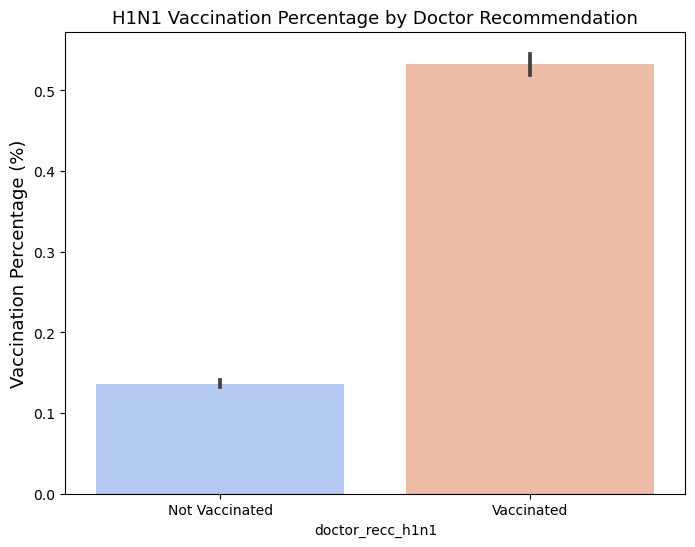

In [ ]:
# Cleaning the data by dropping rows with NaN values in critical columns
df2_clean = df2.dropna(subset=['doctor_recc_h1n1', 'h1n1_vaccine'])

# Treating 'doctor_recc_h1n1'  as a categorical variable
df2_clean['doctor_recc_h1n1'] = df2_clean['doctor_recc_h1n1'].astype('category')

# Creating the bar plot
plt.figure(figsize=(8, 6))
dr = sns.barplot(
    data=df2_clean, 
    x='doctor_recc_h1n1', 
    y='h1n1_vaccine', 
    palette='coolwarm'
)

# Multiply the vaccine percentage by 100 to represent percentage
dr.set_ylabel('Vaccination Percentage (%)', fontsize=13)

# Adjust the x-axis ticks and labels
dr.set_xticks([0, 1])
dr.set_xticklabels(['Not Vaccinated', 'Vaccinated'])

# Set the title
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13)

# Show the plot
plt.show()

The graph highlights a strong relationship between receiving a doctor's recommendation and the likelihood of getting the H1N1 vaccine. Individuals who received a doctor's recommendation for the vaccine show a significantly higher vaccination percentage compared to those who did not receive such a recommendation. This indicates that doctor recommendations play a crucial role in influencing vaccination decisions.

### Plotting H1N1 Vaccination Percentage by Health Insurance

In [ ]:
# Creating a  dictionary for mapping in order to generate better names for the x-axis in the graphs below
ins_dict = {1: 'Health Insurance',
            0: 'No Health Insurance'}

In [27]:
# The column used to create clear x-axis tick marks in the graph below is created by replacing the health insurance words in 'df2' with the values from 'ins_dict'
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

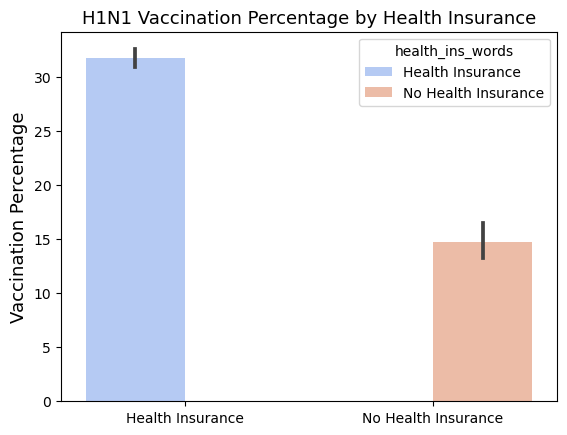

In [ ]:
# Creating a bar plot to visualize the relationship between health insurance and H1N1 vaccination percentage
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100, hue=df2['health_ins_words'], palette='coolwarm')

# The x-axis label is set to empty
ins.set_xlabel('')

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the plot is set to 'H1N1 Vaccination Percentage by Health Insurance' with a font size of 13
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13)

plt.show()

The key observation is that individuals with health insurance have a much higher H1N1 vaccination rate compared to those without insurance.
The vaccination percentage for those with health insurance is around 27%, while for those without insurance it is only around 11%.
This suggests that having health insurance is a significant factor influencing H1N1 vaccine uptake. Public health initiatives aimed at improving vaccination rates may need to address access to healthcare coverage as a barrier.

### Plotting H1N1 Vaccination Percentage by Effectiveness Belief

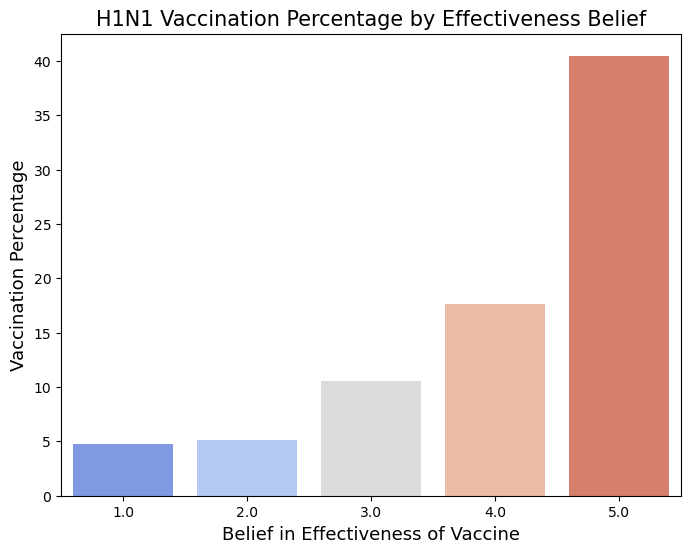

In [ ]:
# Grouping data by opinion on vaccine effectiveness and calculating the mean vaccination percentage
effectiveness_vaccine_data = df2.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].mean() * 100

# Reset index for plotting
effectiveness_vaccine_data = effectiveness_vaccine_data.reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
ins = sns.barplot(
    data=effectiveness_vaccine_data, 
    x='opinion_h1n1_vacc_effective', 
    y='h1n1_vaccine', 
    palette='coolwarm'
)

# Set the x-axis label
ins.set_xlabel('Belief in Effectiveness of Vaccine', fontsize=13)

# Set the y-axis label
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# Set the title of the graph
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=15)

# Show the plot
plt.show()

Based on the graph, the key observation is that the percentage of H1N1 vaccination increases as the belief in vaccine effectiveness increases. Specifically:

The vaccination percentage is lowest (around 1%) when the belief in vaccine effectiveness is 1.0.

As the belief in effectiveness increases to 2.0, 3.0, and 4.0, the vaccination percentage rises to around 6%, 11%, and 19% respectively.

The highest vaccination percentage is around 37% when the belief in vaccine effectiveness is 5.0.

This suggests a strong positive correlation between individuals' perceived effectiveness of the H1N1 vaccine and their likelihood of getting vaccinated. Public health efforts aimed at improving vaccine acceptance may benefit from addressing people's perceptions and beliefs about vaccine effectiveness.

### Plotting H1N1 Vaccination Percentage by Risk Perception of H1N1

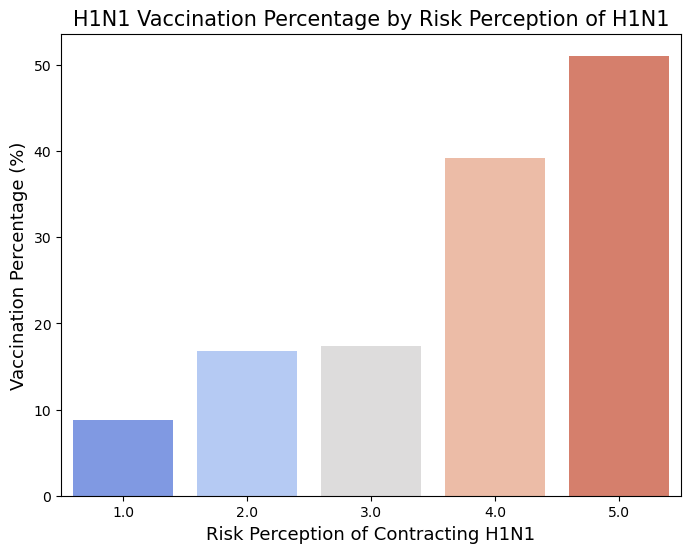

In [ ]:
# Grouping data by 'opinion_h1n1_risk' and calculating the mean vaccination percentage
risk_vaccine_data = df2.groupby('opinion_h1n1_risk')['h1n1_vaccine'].mean() * 100

# Reset index for plotting
risk_vaccine_data = risk_vaccine_data.reset_index()

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    data=risk_vaccine_data, 
    x='opinion_h1n1_risk', 
    y='h1n1_vaccine', 
    palette='coolwarm'
)

# Set axis labels and title
plt.xlabel('Risk Perception of Contracting H1N1', fontsize=13)
plt.ylabel('Vaccination Percentage (%)', fontsize=13)
plt.title('H1N1 Vaccination Percentage by Risk Perception of H1N1', fontsize=15)

# Show the plot
plt.show()

The key observation is that H1N1 vaccination rates increase significantly as individuals' perceived risk of contracting the H1N1 virus increases.Specifically:

At a risk perception of 1.0, the vaccination rate is around 6%.

As risk perception rises to 2.0, 3.0, and 4.0, the vaccination rates increase to around 15%, 19%, and 38% respectively.

The highest vaccination rate of around 48% occurs when the risk perception is 5.0.

This suggests a strong positive correlation between individuals' assessment of their risk of contracting H1N1 and their likelihood of getting vaccinated. Public health efforts to boost vaccination rates may benefit from addressing risk perceptions and improving awareness of the actual risks posed by the H1N1 virus.

## Modeling
In the modeling phase, various machine learning models were evaluated using GridSearchCV to find the best hyperparameter combinations. Class imbalance was addressed, and performance was assessed using metrics like accuracy, precision, F1 score, and ROC-AUC curves. The Gradient Boosting Classifier was chosen as the final model due to its superior accuracy and precision scores.

### Baseline Understanding
Let's use DummyClassifier to make prediction based on the most frequent class in the target variable, which is 0 in our case.

In [36]:
def evaluate(estimator, X_train, X_test, y_train, y_test, roc_auc='roc_auc'):
    # Predictions are made on the training and testing data
    train_out = estimator.predict(X_train)
    test_out = estimator.predict(X_test)

    # Training scores are calculated and printed
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_train, train_out)}")
    print(f"Train Precision: {precision_score(y_train, train_out, zero_division=0)}")
    print(f"Train Recall: {recall_score(y_train, train_out)}")
    print(f"Train F1-Score: {f1_score(y_train, train_out)}")
    print("*********")

    # Testing scores are calculated and printed
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_test, test_out)}")
    print(f"Test Precision: {precision_score(y_test, test_out, zero_division=0)}")
    print(f"Test Recall: {recall_score(y_test, test_out)}")
    print(f"Test F1-Score: {f1_score(y_test, test_out)}")

    # If ROC-AUC score is not skipped, it is printed
    if roc_auc != 'skip':
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")

    # Confusion matrix is computed and plotted for the test set
    cm = confusion_matrix(y_test, test_out)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks(np.arange(len(estimator.classes_)), estimator.classes_, rotation=90)
    plt.yticks(np.arange(len(estimator.classes_)), estimator.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

In [37]:
# The dummy model through the pipeline setup
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [ ]:
# Fitting the dummy model 
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precision: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
*********
Testing Scores:
Test Accuracy: 0.7874376039933444
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


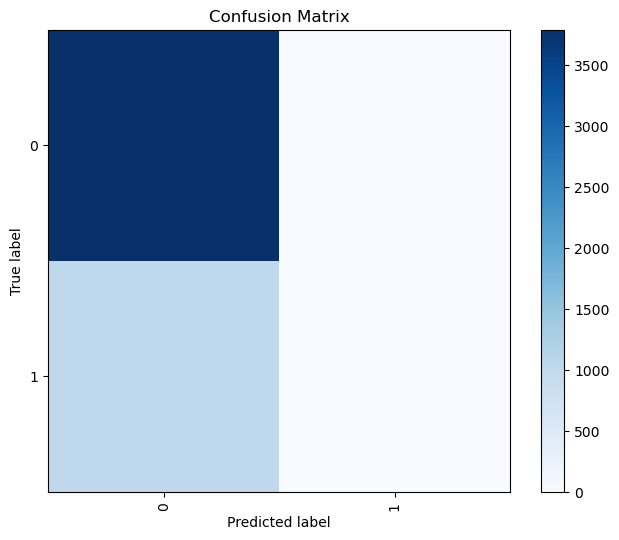

In [ ]:
# Evaluating the dummy model 
evaluate(dummy_model, X_tr, X_te, y_tr, y_te, roc_auc='skip')

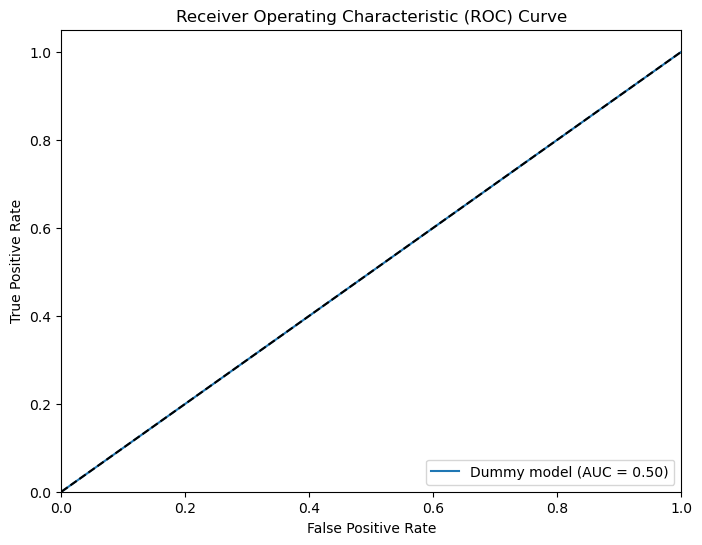

In [40]:
# The roc-auc curve for dummy model plot
def plot_roc_curve(model, X_test, y_test, name='Model'):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(dummy_model, X_tr, y_tr, name='Dummy model'); 

So, the mean of the accuracy score is a little over 78% if we always guess the majority class, which is 0 in this case.

## MODEL 1: Decision Tree Classifier

In [42]:
# The DecisionTreeClassifier to go though the pipeline setup
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])


In [ ]:
# Fitting the model to the training data 
dtc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

Training Scores:
Train Accuracy: 0.7920220511753693
Train Precision: 0.5071858288770054
Train Recall: 0.7429620563035496
Train F1-Score: 0.6028404012315026
*********
Testing Scores:
Test Accuracy: 0.7886855241264559
Test Precision: 0.5019710906701709
Test Recall: 0.7475538160469667
Test F1-Score: 0.6006289308176102


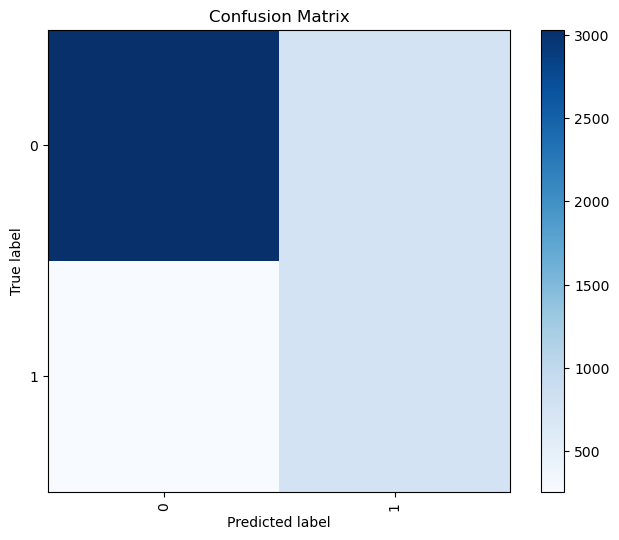

In [44]:
# The decision tree model for various metrics evaluation
evaluate(dtc, X_tr, X_te, y_tr, y_te, roc_auc='skip')

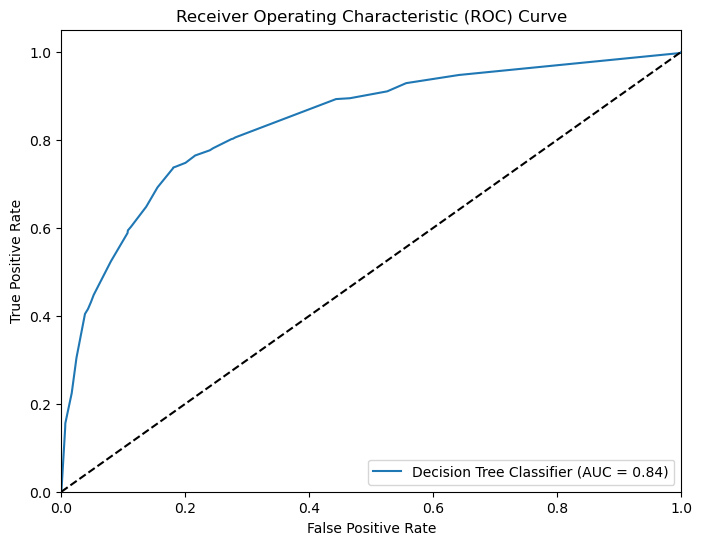

In [45]:
# The roc-auc curve for decision tree model
plot_roc_curve(dtc, X_te, y_te, name='Decision Tree Classifier'); 

This decision tree model is not overfitting, but we have a low precision score, as well as a low f1 score. However, the AUC for this model is 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing the false positives. This model is not overfitting.

## MODEL 2: Logistic Regression

In [46]:
# The logistic regression model to go through the pipeline setup.
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
                                      random_state=42))
])

In [47]:
# The logistic regression model on the training data
logreg.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

Training Scores:
Train Accuracy: 0.7763771010151439
Train Precision: 0.48286883150089493
Train Recall: 0.7395731349128647
Train F1-Score: 0.5842679248201718
*********
Testing Scores:
Test Accuracy: 0.7793261231281198
Test Precision: 0.48755583918315254
Test Recall: 0.7475538160469667
Test F1-Score: 0.590189262263422
ROC-AUC: 0.767728307917831


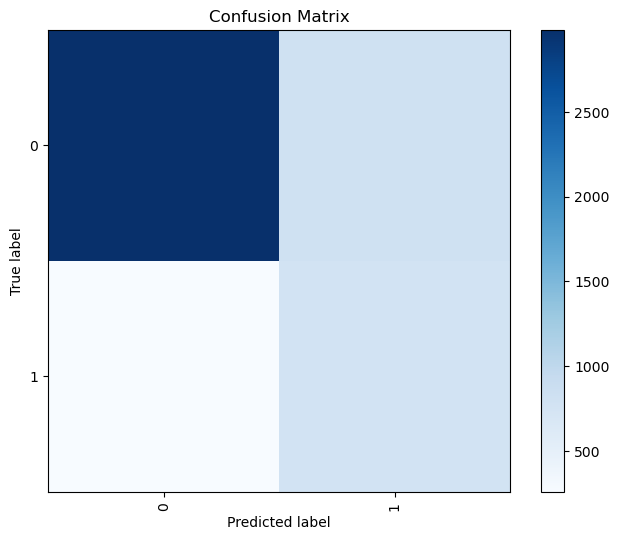

In [49]:
# The logistic regression for various metrics
evaluate(logreg, X_train, X_te, y_train, y_te)

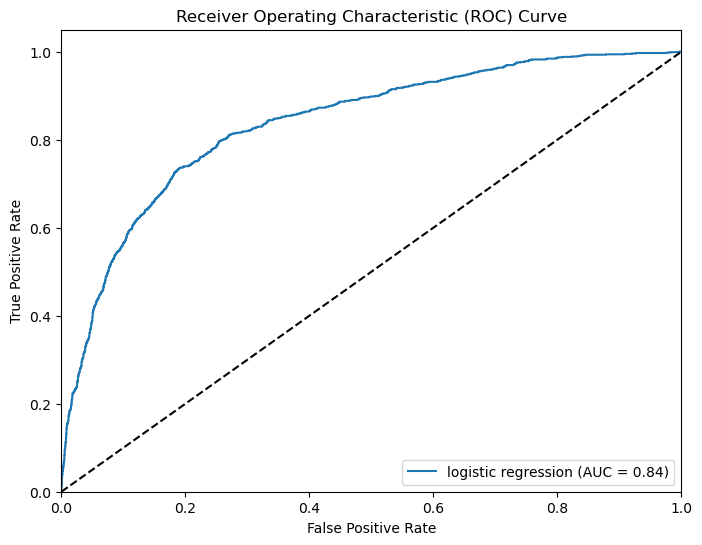

In [50]:
# The roc-auc curve for the logistic regression model is plotted.
plot_roc_curve(logreg, X_te, y_te, name='logistic regression');

This logistic regression model has low precision and f1 scores, and has an AUC equal to the decision tree AUC above. This model is not overfitting.

## Comparison of Model ROC Curves

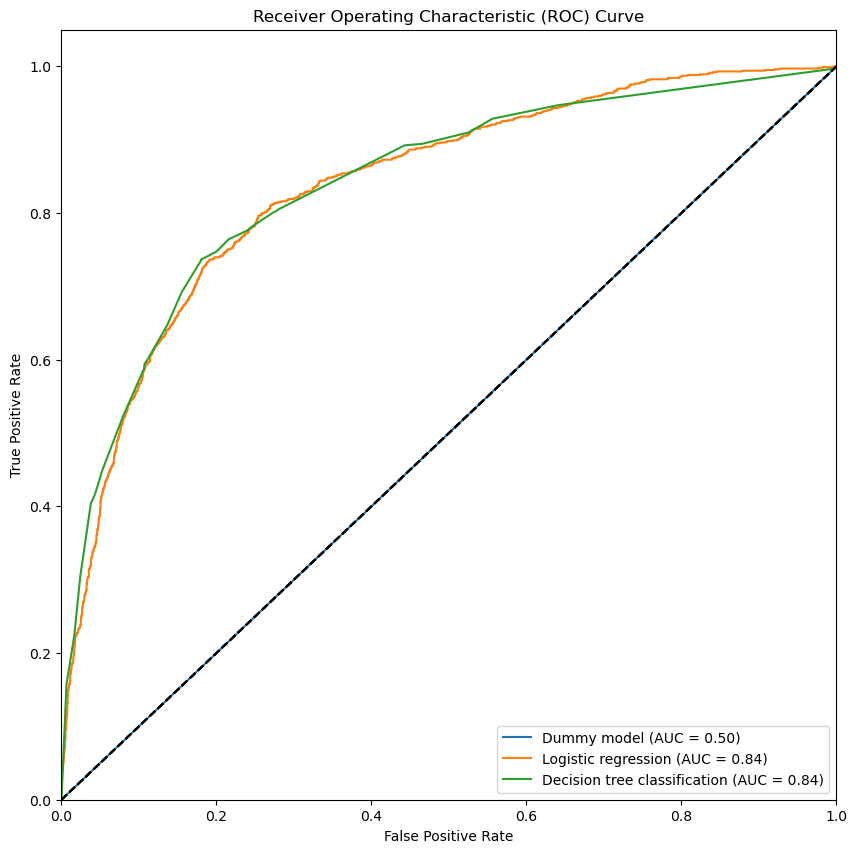

In [51]:
def plot_roc_curve(model, X_test, y_test, name='Model', ax=None):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")

    if ax is None:
        plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(dummy_model, X_te, y_te,
               name='Dummy model', ax=ax)
plot_roc_curve(logreg, X_te, y_te, 
               name='Logistic regression', ax=ax)
plot_roc_curve(dtc, X_te, y_te,
               name='Decision tree classification', ax=ax);


## Evaluation
The models developed for predicting H1N1 vaccine uptake were evaluated based on key metrics, including precision, recall, F1 score, and AUC (Area Under the Curve). Both the Decision Tree Classifier and Logistic Regression achieved a strong AUC score of 0.84, indicating a solid ability to distinguish between vaccinated and non-vaccinated individuals.

However, both models struggled with low precision and F1 scores, suggesting challenges in accurately predicting true vaccination behavior while minimizing false positives. Despite these limitations, the models demonstrated robustness to overfitting and provided valuable insights into the factors influencing vaccination decisions.

The evaluation highlights the need for further refinement, such as exploring advanced algorithms, improving feature engineering, and addressing potential data imbalances. These improvements could enhance predictive performance and make the models more effective for guiding public health strategies.

## Conclusions, Recommendations & Next steps 
### conclusion 
The analysis highlights critical factors influencing H1N1 vaccine uptake, including doctor recommendations, health insurance access, and perceptions of vaccine effectiveness and risk. The machine learning models, while achieving a strong Area Under the Curve (AUC) score of 0.84, face challenges in precision and F1 scores, indicating the complexity of predicting vaccination behavior. Despite these limitations, the models provide valuable insights into key drivers of vaccination decisions, informing strategies to improve public health outcomes.

### Recommendations
1. Promote Doctor Recommendations:
Emphasize the importance of doctor-patient communication in encouraging vaccine uptake. Training and incentivizing healthcare providers to advocate for vaccinations could significantly boost vaccination rates.

2. Address Healthcare Access Barriers:
Ensure vaccines are accessible to individuals regardless of health insurance status. Public health initiatives should focus on reducing financial and logistical barriers to vaccination.

3. Enhance Educational Outreach:
Develop targeted campaigns to address vaccine skepticism and misinformation. Educating the public about the effectiveness of vaccines and the risks associated with H1N1 can positively influence vaccination decisions.

4. Leverage Insights from Predictive Models:
Use the models to identify high-risk populations and tailor interventions to maximize their impact.

### Next steps 
1. Explore Additional Features:
Further feature engineering and integration of new data sources (e.g., recent survey data or geographic trends) can improve model accuracy and generalizability.

2. Extend Analysis to Seasonal Flu Vaccines:
Broaden the scope to include seasonal flu vaccination, providing a more comprehensive understanding of vaccination behaviors.

3. Experiment with Advanced Modeling Techniques:
Test more sophisticated machine learning algorithms (e.g., ensemble methods, neural networks) to enhance predictive performance.

4. Collaborate with Public Health Authorities:
Share findings with stakeholders to inform the design of real-world vaccination campaigns and policies.